In [1]:
import numpy as np
import pandas as pd

In [2]:
weather_data=pd.read_csv('BEJ201504_3hours.csv')
traveler_data=pd.read_csv('datashu_静安寺.csv')

In [3]:
traveler_data_sorted=traveler_data.sort_values(by=['outTime'])
traveler_data_sorted['Day']=traveler_data_sorted['outTime'].apply(lambda x:int(x[8:10]))
traveler_data_sorted.reset_index(inplace=True)
del traveler_data_sorted['Unnamed: 0']
del traveler_data_sorted['Unnamed: 0.1']

In [4]:
weather_data['time']=weather_data['UTC time']*3600
weather_data['Day']=weather_data['Date'].apply(lambda x:int(x[0:2]))
weather_data_sorted=weather_data.sort_values(by=['Day','UTC time'],ascending=[True,False])
weather_data_sorted.index=[i for i in range(240)]
del weather_data_sorted['Unnamed: 0']

In [5]:
weather_data_sorted.head(12)

,Date,UTC time,Temp. (ºC),Rel. Hum. (%),Pressure/ Geopot.,Wind dir,Wins speed (Km/h),Clouds,Low clouds,Medium clouds,High clouds,Prec. (mm),Max temp. (ºC),Min temp. (ºC),Conditions,time,Day
0,01/04/2015,23,16.1,96%,1007.6 Hpa,090º (E ),10.8,N/A,-,-,-,-,-,-,mist,82800,1
1,01/04/2015,20,15.2,94%,1009.3 Hpa,090º (E ),10.8,8/8,8/8 N/A,NaN,NaN,-,-,-,"Overcast, mist",72000,1
2,01/04/2015,17,18.8,82%,1009.1 Hpa,090º (E ),14.4,2/8,2/8 N/A,NaN,NaN,-,-,-,Few clouds,61200,1
3,01/04/2015,14,21.9,72%,1010.2 Hpa,090º (E ),14.4,2/8,2/8 N/A,NaN,NaN,-,-,17.8,Few clouds,50400,1
4,01/04/2015,11,22.6,70%,1012.4 Hpa,070º (E ),14.4,0/8,-,-,-,-,-,-,Clear,39600,1
5,01/04/2015,8,20.1,75%,1012.9 Hpa,090º (E ),14.4,1/8,-,-,CI,-,-,-,Few clouds,28800,1
6,01/05/2015,5,15.8,87%,1013.7 Hpa,140º (SE),10.8,N/A,-,-,-,-,-,-,mist,18000,1
7,01/05/2015,2,15.6,89%,1013.8 Hpa,110º (E ),7.2,N/A,-,-,-,-,25.4,-,mist,7200,1
8,02/04/2015,23,16.9,88%,1003.6 Hpa,320º (NW),7.2,N/A,-,-,-,-,-,-,mist,82800,2
9,02/04/2015,20,20.8,88%,1001.8 Hpa,270º (W ),14.4,8/8,8/8 N/A,NaN,NaN,10.0(6h),-,-,"Overcast, rain",72000,2


In [6]:
traveler_data_sorted.head(5)

,index,userID,inTime,inLine,inStation,outTime,outLine,outStation,transfered_inTime,transfered_outTime,dayName,Day
0,14495,501731973,2015-04-01 05:18:58,7,上海大学站,2015-04-01 06:01:00,7,静安寺,19138.0,21660.0,2,1
1,4381,501731973,2015-04-01 05:18:58,7,上海大学站,2015-04-01 06:01:00,7,静安寺,19138.0,21660.0,2,1
2,14825,2703430117,2015-04-01 06:13:52,7,上海大学站,2015-04-01 06:44:24,7,静安寺,22432.0,24264.0,2,1
3,4711,2703430117,2015-04-01 06:13:52,7,上海大学站,2015-04-01 06:44:24,7,静安寺,22432.0,24264.0,2,1
4,14758,2503342758,2015-04-01 06:15:01,7,上海大学站,2015-04-01 06:44:38,7,静安寺,22501.0,24278.0,2,1


In [7]:
day_list=traveler_data_sorted.groupby('Day').count().index
day_list

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24],
           dtype='int64', name='Day')

In [8]:
ultimate=traveler_data_sorted[0:1]
for day in day_list:
    day_traveler=traveler_data_sorted[traveler_data_sorted['Day']==day]
    day_weather=weather_data_sorted[weather_data_sorted['Day']==day]
    temp=day_weather['Temp. (ºC)'].tolist()
    cond=day_weather['Conditions'].tolist()
    _temp=[]
    _cond=[]
    for i in range(len(day_traveler.index)):
        count=7200
        if(day_traveler.iloc[i,9]<7200 or day_traveler.iloc[i,9]>82800):
            _temp.append(temp[0])
            _cond.append(cond[0])
        else:
            for j in range(7,0,-1):
                if(day_traveler.iloc[i,9]>=count and day_traveler.iloc[i,9]<=count+10800):
                    _temp.append(temp[j])
                    _cond.append(cond[j])
                    break
                count=count+10800
    day_traveler['temp']=_temp
    day_traveler['conditions']=_cond
    ultimate=pd.merge(ultimate,day_traveler,how='outer')

D:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [9]:
ultimate['timecs']=ultimate['transfered_outTime']-ultimate['transfered_inTime']

In [10]:
ultimate.to_csv('ultimate.csv')

In [11]:
data=ultimate[['temp','conditions','timecs']]
data

,temp,conditions,timecs
0,15.8,mist,2522.0
1,15.8,mist,2522.0
2,15.8,mist,1832.0
3,15.8,mist,1832.0
4,15.8,mist,1777.0
...,...,...,...
20212,18.0,Cloudy,1934.0
20213,18.0,Cloudy,1972.0
20214,18.0,Cloudy,1972.0
20215,18.0,Cloudy,2001.0


In [12]:
data1=data[data['timecs']<3000 ]
dic=dict(data1.groupby('temp')['timecs'].mean())

In [13]:
temp=list(dic.keys())
timecs=list(dic.values())
timecs=list(map(int,timecs))

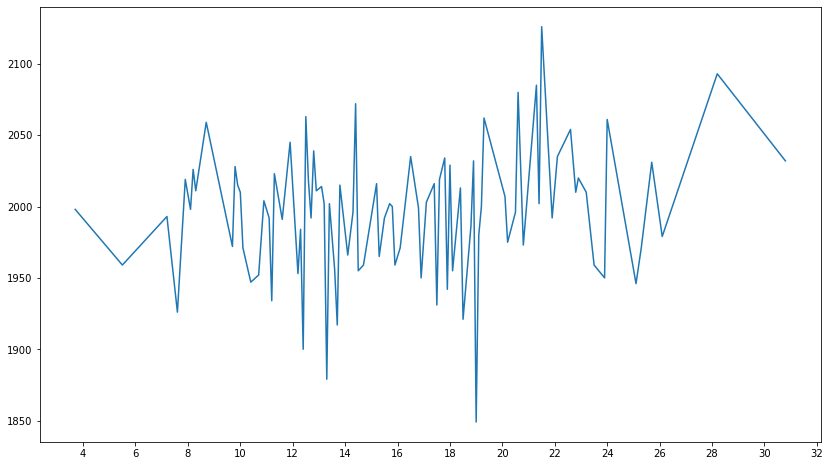

In [14]:
import matplotlib.pyplot as plt
#%matplotlib
plt.figure(figsize = (14,8))
x=temp
y=timecs
plt.xticks([i for i in range(0,40,2)])
#plt.yticks(timecs)
plt.plot(x,y)